### Load csv file

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

/tmp/ipykernel_1265/594887146.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('data.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Using the ProfileReport of Pandas to get an overview of the data and help understand the data clearly. Then, processing, cleaning, and analyzing data easier

In [3]:
df_check = ProfileReport(df)
df_check.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Reprocessing

#### Double check missing value on dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 2 columns with null values are Description and CustomerID. These are the special value that is hard to fill in or without alternative methods to handle them, so they will completely eliminate them.

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Drop NA values

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


#### There are several types of peculiar transactions and list all special Stock Codes

In [7]:
list_special_codes = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [8]:
df[df['StockCode'].apply(lambda x: x in list_special_codes)]
df = df[~df['StockCode'].isin(list_special_codes)].sort_index()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df['Total Price'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


#### In this dataset, there are transactions where the customer cancels the order. Its means that the transactions when the customer orders must also be processed or dropped according to the canceled transactions. This is to ensure that revenue statistics will not be affected by those transactions

In [10]:
df1 = df.groupby(["Description","CustomerID","Country",])["Total Price"].sum().reset_index()
df1

,Description,CustomerID,Country,Total Price
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55
1,4 PURPLE FLOCK DINNER CANDLES,12940.0,United Kingdom,2.55
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79
...,...,...,...,...
268434,ZINC WIRE SWEETHEART LETTER TRAY,17530.0,United Kingdom,3.75
268435,ZINC WIRE SWEETHEART LETTER TRAY,17706.0,United Kingdom,37.50
268436,ZINC WIRE SWEETHEART LETTER TRAY,17812.0,United Kingdom,3.75
268437,ZINC WIRE SWEETHEART LETTER TRAY,17835.0,United Kingdom,6.25


In [11]:
df_2 = df[["InvoiceNo", "StockCode","Description", "InvoiceDate", "CustomerID", "Quantity"]].sort_values(by="CustomerID",ascending=True)
df_merge = pd.merge(df1,df_2,how='outer')
df_merge

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,1
1,4 PURPLE FLOCK DINNER CANDLES,12940.0,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00,1
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,6
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,12
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,1
...,...,...,...,...,...,...,...,...
404919,ZINC WIRE SWEETHEART LETTER TRAY,17706.0,United Kingdom,37.50,560035,23137,2011-07-14 13:41:00,4
404920,ZINC WIRE SWEETHEART LETTER TRAY,17812.0,United Kingdom,3.75,578521,23137,2011-11-24 14:06:00,1
404921,ZINC WIRE SWEETHEART LETTER TRAY,17835.0,United Kingdom,6.25,581101,23137,2011-12-07 11:48:00,5
404922,ZINC WIRE SWEETHEART LETTER TRAY,17841.0,United Kingdom,11.25,555110,23137,2011-05-31 14:34:00,2


In [12]:
df_negative = df1[df1["Total Price"] <= 0]
df_negative

,Description,CustomerID,Country,Total Price
159,DOLLY GIRL BEAKER,12940.0,United Kingdom,-1.25
505,SET 2 TEA TOWELS I LOVE LONDON,15128.0,United Kingdom,0.00
659,SPACEBOY BABY GIFT SET,15810.0,United Kingdom,0.00
667,SPACEBOY BABY GIFT SET,16360.0,United Kingdom,0.00
714,TRELLIS COAT RACK,15993.0,United Kingdom,0.00
...,...,...,...,...
267589,ZINC METAL HEART DECORATION,13394.0,United Kingdom,0.00
267947,ZINC SWEETHEART WIRE LETTER RACK,17716.0,United Kingdom,0.00
268245,ZINC T-LIGHT HOLDER STARS SMALL,17504.0,United Kingdom,0.00
268264,ZINC TOP 2 DOOR WOODEN SHELF,14217.0,United Kingdom,0.00


#### After calculating total price based on CustomerID and StockCode. Then, drop the data with total price <= 0 (because it includes unreasonable transactions with order cancellation data even though there is no previous order data)

In [13]:
df3 = df_merge[~df_merge["Total Price"].isin(df_negative["Total Price"])]
df3

,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,1
1,4 PURPLE FLOCK DINNER CANDLES,12940.0,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00,1
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,6
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,12
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,1
...,...,...,...,...,...,...,...,...
404919,ZINC WIRE SWEETHEART LETTER TRAY,17706.0,United Kingdom,37.50,560035,23137,2011-07-14 13:41:00,4
404920,ZINC WIRE SWEETHEART LETTER TRAY,17812.0,United Kingdom,3.75,578521,23137,2011-11-24 14:06:00,1
404921,ZINC WIRE SWEETHEART LETTER TRAY,17835.0,United Kingdom,6.25,581101,23137,2011-12-07 11:48:00,5
404922,ZINC WIRE SWEETHEART LETTER TRAY,17841.0,United Kingdom,11.25,555110,23137,2011-05-31 14:34:00,2


## Exploratory Data Analysis

#### Revenue generated by the sales for each day and the sales trend

In [14]:
general_trend = pd.DataFrame(data={'Date':pd.to_datetime(df["InvoiceDate"]).dt.date,
                                  'Total Price':df["Total Price"]})
general_trend = general_trend.groupby("Date")["Total Price"].sum()
general_trend = pd.DataFrame(general_trend)

In [15]:
dates = []
dates.append(pd.to_datetime("201012",format="%Y%m"))
dates += [pd.to_datetime("2011"+str(month),format="%Y%m") for month in range(1,12)]

In [16]:
rolling_days = general_trend.copy()
rolling_days["Total Price"] = rolling_days["Total Price"].rolling(window=30).mean() 

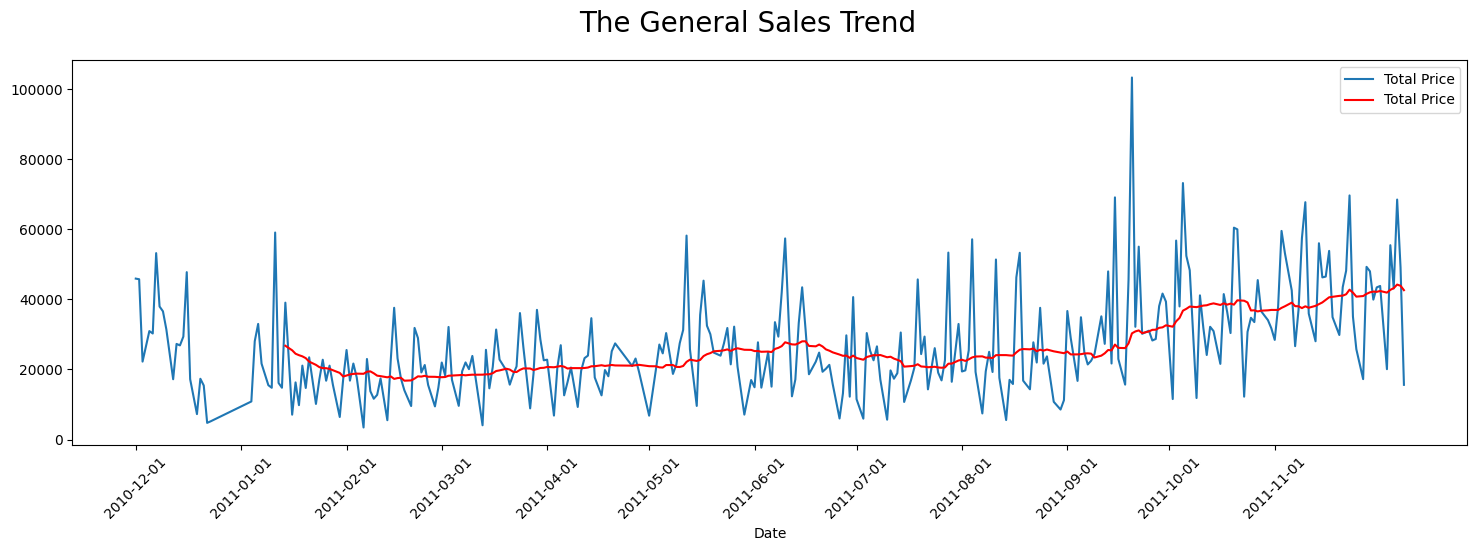

In [17]:
%matplotlib inline
plt.figure(figsize = (18,5)).suptitle('The General Sales Trend', fontsize=20)
sns.lineplot(data=general_trend)
sns.lineplot(data=rolling_days, palette=['red'])
plt.xticks(dates,rotation = 45)
plt.show()

#### After, I group all duplicate descriptions based on CustomerID, then, we join to the new column is All Description. Its prepare for RFM Analysis later

In [18]:
df_dup = df3[df3["CustomerID"].duplicated(keep=False)]
df3["All StockCode"] = df_dup.groupby(["InvoiceNo","CustomerID"])["StockCode"].transform(', '.join)
df3.head()

/tmp/ipykernel_1265/1505957312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["All StockCode"] = df_dup.groupby(["InvoiceNo","CustomerID"])["StockCode"].transform(', '.join)


,Description,CustomerID,Country,Total Price,InvoiceNo,StockCode,InvoiceDate,Quantity,All StockCode
0,4 PURPLE FLOCK DINNER CANDLES,12937.0,United Kingdom,2.55,578551,72800B,2011-11-24 15:05:00,1,"72800B, 22150, 22077, 85177, 22588, 22816, 229..."
1,4 PURPLE FLOCK DINNER CANDLES,12940.0,United Kingdom,2.55,571270,72800B,2011-10-16 12:09:00,1,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ..."
2,4 PURPLE FLOCK DINNER CANDLES,12953.0,United Kingdom,15.30,579533,72800B,2011-11-30 09:24:00,6,"72800B, 72800C, 23485, 23458, 48194, 23284, 48..."
3,4 PURPLE FLOCK DINNER CANDLES,13949.0,United Kingdom,9.48,581015,72800B,2011-12-07 09:35:00,12,"72800B, 72800C, 22915, 84879, 22138, 23417, 22..."
4,4 PURPLE FLOCK DINNER CANDLES,14071.0,United Kingdom,0.79,580876,72800B,2011-12-06 12:12:00,1,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8..."


#### After join all descriptions into the new column, we drop all redundant rows with duplicate

In [19]:
df_dup = df3[[ "InvoiceNo", "CustomerID","All StockCode","InvoiceDate", "Country"]].drop_duplicates()
df_dup.head()

,InvoiceNo,CustomerID,All StockCode,InvoiceDate,Country
0,578551,12937.0,"72800B, 22150, 22077, 85177, 22588, 22816, 229...",2011-11-24 15:05:00,United Kingdom
1,571270,12940.0,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ...",2011-10-16 12:09:00,United Kingdom
2,579533,12953.0,"72800B, 72800C, 23485, 23458, 48194, 23284, 48...",2011-11-30 09:24:00,United Kingdom
3,581015,13949.0,"72800B, 72800C, 22915, 84879, 22138, 23417, 22...",2011-12-07 09:35:00,United Kingdom
4,580876,14071.0,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8...",2011-12-06 12:12:00,United Kingdom


In [20]:
df4 = df3.groupby(["InvoiceNo"])["Total Price"].sum().reset_index()
df4.head()

,InvoiceNo,Total Price
0,536365,2506.04
1,536366,399.60
2,536367,684.53
3,536368,172.05
4,536369,53.55


In [21]:
df_dup2 = pd.merge(df_dup,df4,on='InvoiceNo')
df_dup2["InvoiceNo"] = df_dup2["InvoiceNo"].replace('C', '', regex=True)
df_dup2

,InvoiceNo,CustomerID,All StockCode,InvoiceDate,Country,Total Price
0,578551,12937.0,"72800B, 22150, 22077, 85177, 22588, 22816, 229...",2011-11-24 15:05:00,United Kingdom,900.69
1,571270,12940.0,"72800B, 85034A, 85034C, 85034B, 21615, 21615, ...",2011-10-16 12:09:00,United Kingdom,673.97
2,579533,12953.0,"72800B, 72800C, 23485, 23458, 48194, 23284, 48...",2011-11-30 09:24:00,United Kingdom,329.85
3,581015,13949.0,"72800B, 72800C, 22915, 84879, 22138, 23417, 22...",2011-12-07 09:35:00,United Kingdom,974.42
4,580876,14071.0,"72800B, 72800E, 72800C, 22438, 23417, 22068, 8...",2011-12-06 12:12:00,United Kingdom,187.42
...,...,...,...,...,...,...
21127,555267,16359.0,84836,2011-06-01 16:15:00,United Kingdom,740.21
21128,571319,17164.0,23145,2011-10-17 10:50:00,United Kingdom,21.85
21129,562050,14133.0,23144,2011-08-02 11:34:00,United Kingdom,19.92
21130,552135,14944.0,23144,2011-05-06 11:51:00,United Kingdom,59.76


#### Apply RFM analysis to group customers based on the Recency, Frequency and Monetary total of their recent transactions to identify the segment customers

In [22]:
most_recent_date = df_dup2["InvoiceDate"].max()
rfm_data = df_dup2.groupby(by='CustomerID').aggregate({
    'InvoiceDate' : lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo' : lambda x: len(x),
    'Total Price' : lambda x: sum(x)
})
rfm_data.columns = ['Recency', 'Frequency', 'Monetary Total']
rfm_data.head()

,Recency,Frequency,Monetary Total
CustomerID,,,
12347.0,1,7,11323.81
12348.0,74,4,2181.64
12349.0,18,1,1457.55
12350.0,309,1,294.40
12352.0,35,8,2122.87


#### Because the value between Frequently, Recency, and Monetary Total is too large, it must be scaled on the same standard

In [23]:
from sklearn.preprocessing import StandardScaler
rfm_data_scale = StandardScaler()
rfm_data_scale = rfm_data_scale.fit_transform(rfm_data) 
rfm_data_scale = rfm_data_scale.tolist()

df_rfm_data_scale = pd.DataFrame (rfm_data_scale, columns = ['Recency', 'Frequency', 'Monetary Total'])
df_rfm_data_scale

,Recency,Frequency,Monetary Total
0,-0.895386,0.234183,0.080973
1,-0.163859,-0.098684,-0.087159
2,-0.725030,-0.431552,-0.100476
3,2.191056,-0.431552,-0.121867
4,-0.554675,0.345139,-0.088240
...,...,...,...
4317,1.870387,-0.431552,-0.123960
4318,0.898358,-0.431552,-0.125795
4319,-0.835260,-0.209640,-0.123804
4320,-0.875344,1.232784,0.080547


## Clustering by Kmeans

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#### Before using Kmean, I have to determine the optimal K number, so I use Elbow method to find the optimal K 

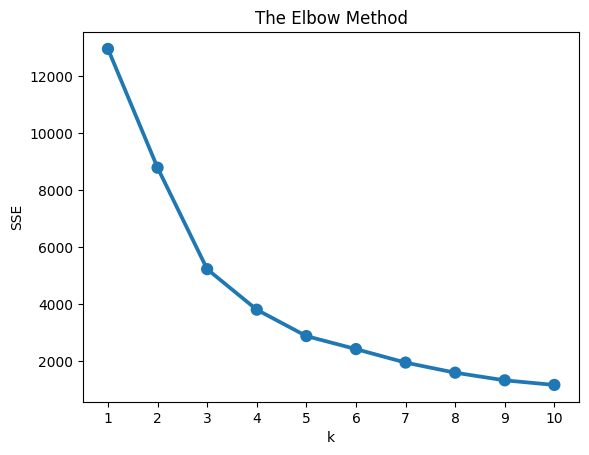

In [25]:
sse = {}

for k in range(1, 11):    
    kmeans = KMeans(n_clusters=k, random_state=1)    
    kmeans.fit(df_rfm_data_scale)    
    sse[k] = kmeans.inertia_ 
    
# Plot SSE for each value of k    
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

on the graph above, k = 3 is optimal

In [26]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [27]:
y_predicted = km.fit_predict(df_rfm_data_scale[['Frequency', 'Monetary Total']]) 
y_predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [28]:
rfm_data['cluster_Kmeans'] = y_predicted
rfm_data.head()

,Recency,Frequency,Monetary Total,cluster_Kmeans
CustomerID,,,,
12347.0,1,7,11323.81,1
12348.0,74,4,2181.64,1
12349.0,18,1,1457.55,1
12350.0,309,1,294.40,1
12352.0,35,8,2122.87,1


In [29]:
rfm_data["cluster_Kmeans"].value_counts()

1    4148
0     165
2       9
Name: cluster_Kmeans, dtype: int64

In [30]:
rfm_data = rfm_data.reset_index()

In [31]:
rfm_data0 = rfm_data[rfm_data["cluster_Kmeans"] == 0]
rfm_data1 = rfm_data[rfm_data["cluster_Kmeans"] == 1]
rfm_data2 = rfm_data[rfm_data["cluster_Kmeans"] == 2]
rfm_data0.head()

,CustomerID,Recency,Frequency,Monetary Total,cluster_Kmeans
54,12415.0,23,22,309810.78,0
68,12431.0,35,26,25680.02,0
74,12437.0,1,19,12535.89,0
98,12471.0,1,45,155947.88,0
101,12474.0,16,27,20336.55,0


In [32]:
DeepnoteChart(rfm_data0, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Monetary Total","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"Monetary Total"},"color":{"sort":null,"type":"quantitative","field":"Recency","scale":{"scheme":"teals"}}}}]}],"title":"Group 0","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

##### As can be seen, with group 0, which is the group with the frequency of purchases, the revenue they generate is relatively stable and pretty high. It is a potential group of customers

In [33]:
## Group 1
rfm_data1.head()

,CustomerID,Recency,Frequency,Monetary Total,cluster_Kmeans
0,12347.0,1,7,11323.81,1
1,12348.0,74,4,2181.64,1
2,12349.0,18,1,1457.55,1
3,12350.0,309,1,294.40,1
4,12352.0,35,8,2122.87,1


In [34]:
DeepnoteChart(rfm_data1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Monetary Total","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"Monetary Total"},"color":{"sort":null,"type":"quantitative","field":"Recency","scale":{"scheme":"teals"}}}}]}],"title":"Group 1","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

##### Group 1, with low purchase frequency and quite high recency. Most customers belong to this group, which is a group of regular, and revenue is not high

In [35]:
## Group 2
rfm_data2.head()

,CustomerID,Recency,Frequency,Monetary Total,cluster_Kmeans
322,12748.0,0,215,123333.74,2
558,13089.0,2,118,429409.68,2
1682,14646.0,1,74,1917875.79,2
1871,14911.0,0,242,1276621.07,2
1975,15061.0,3,54,632029.00,2


In [36]:
DeepnoteChart(rfm_data2, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Monetary Total","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"Monetary Total"},"color":{"sort":null,"type":"quantitative","field":"Recency","scale":{"scheme":"teals"}}}}]}],"title":"Group 2","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

##### Group 2, the frequency of purchase is very high. This is a group have the fewest customers but highest frequency and create the most revenue. Should focus on this group as well as increase the conversion rate from another to this group

### Overview of all group

<AxesSubplot: xlabel='Frequency', ylabel='Monetary Total'>

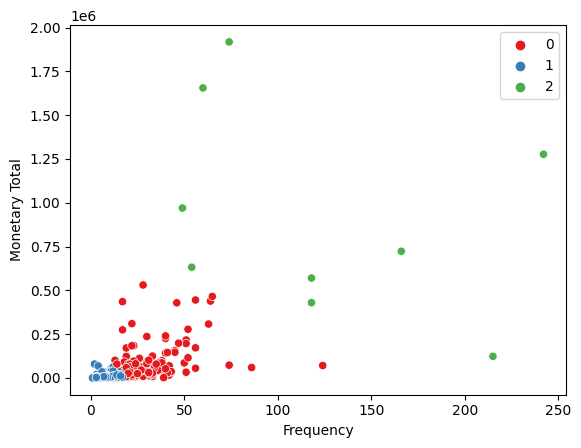

In [37]:
sns.scatterplot(rfm_data, x = "Frequency", y = "Monetary Total", hue = y_predicted, palette='Set1')

=> Most customers in group 2 have the most revenue. Besides that, group 0 is also a potential group can generate more revenue.

<AxesSubplot: xlabel='Recency', ylabel='Monetary Total'>

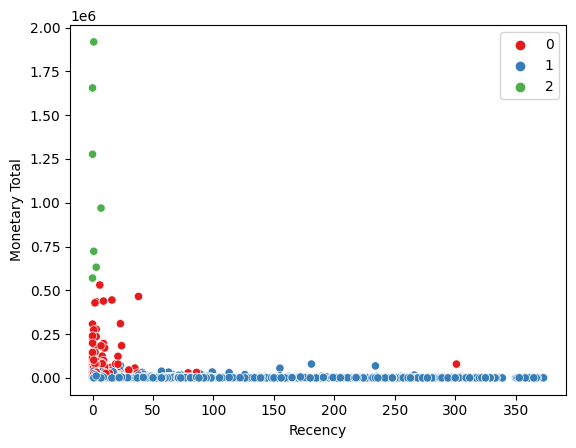

In [38]:
sns.scatterplot(rfm_data, x = "Recency", y = "Monetary Total", hue = y_predicted, palette='Set1')

=> The higher recency, the less revenue is generated. Both group 0 and 2 have good performance about less Recency and high Monetary Value.

<AxesSubplot: xlabel='Frequency', ylabel='Recency'>

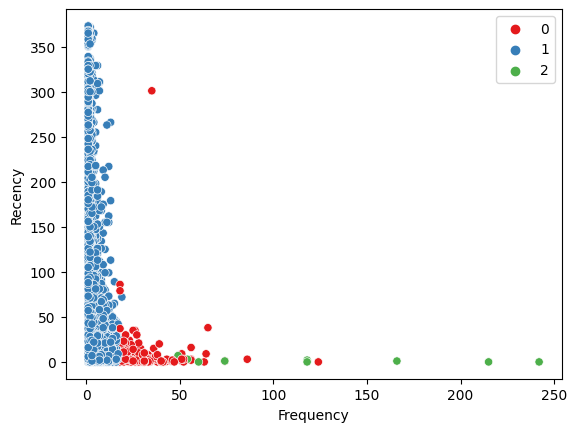

In [39]:
sns.scatterplot(rfm_data, x = "Frequency", y = "Recency", hue = y_predicted, palette='Set1')

=> Obviously, when a customer purchases with a high Frequency, Recency will be inversely proportional to this.

#### From those things:
+ Less Recency
+ High Frequency
+ High Monetary
=> Group 0 is a potential group that should be focusing on it, implement more preferential policies, and turn to Group 2 which is the group that generates the most revenue.

### Top 10 items bought the most

In [40]:
df_fpgrowth = df
df_fpgrowth["incident_count"] = 1 
df_fpgrowth = df_fpgrowth.groupby("Description").sum().sort_values("incident_count", ascending=False).reset_index()
df_fpgrowth.head(10).style.background_gradient(cmap='Blues')

,Description,Quantity,UnitPrice,CustomerID,Total Price,incident_count
0,WHITE HANGING HEART T-LIGHT HOLDER,34147,5985.120000,32213017.000000,93823.850000,2070
1,REGENCY CAKESTAND 3 TIER,11555,23678.050000,28473438.000000,132870.400000,1905
2,JUMBO BAG RED RETROSPOT,45066,3345.700000,25396253.000000,83236.760000,1662
3,ASSORTED COLOUR BIRD ORNAMENT,35314,2383.460000,21602517.000000,56499.220000,1418
4,PARTY BUNTING,15027,6897.060000,21766527.000000,67687.530000,1416
5,LUNCH BAG RED RETROSPOT,17145,2250.100000,20651345.000000,27230.050000,1358
6,SET OF 3 CAKE TINS PANTRY DESIGN,6864,6099.790000,18807897.000000,32607.800000,1232
7,LUNCH BAG BLACK SKULL.,11173,1850.100000,17455069.000000,17838.850000,1126
8,PACK OF 72 RETROSPOT CAKE CASES,33409,591.830000,16309247.000000,16247.950000,1080
9,PAPER CHAIN KIT 50'S CHRISTMAS,15164,3019.710000,15914479.000000,41500.480000,1029


In [41]:
import plotly.express as px

df_fpgrowth["all"] = "Top 10 items" 
fig = px.treemap(df_fpgrowth.head(10), path=['all', "Description"], values='incident_count',
                  color=df_fpgrowth["incident_count"].head(10), hover_data=['Description'],
                  color_continuous_scale='Blues')
fig

## Data Prep for FPGrowth

#### Convert data to true and false values to use for association rules

In [42]:
df_preprocessing_fpgrowth = df3.groupby(['CustomerID', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID')
df_preprocessing_fpgrowth

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
def num(x):
    if x == 0:
        return False
    if x >= 1:
        return True

df_for_fpgrowth = df_preprocessing_fpgrowth.applymap(num)
df_for_fpgrowth.head(10)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12348.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12349.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12350.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12352.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12353.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12354.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12355.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12356.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## FPGrowth

In [44]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

res=fpgrowth(df_for_fpgrowth,min_support=0.05, use_colnames=True)
res.head(10)

,support,itemsets
0,0.201296,(REGENCY CAKESTAND 3 TIER)
1,0.103887,(RABBIT NIGHT LIGHT)
2,0.097409,(ROSES REGENCY TEACUP AND SAUCER )
3,0.094863,(60 TEATIME FAIRY CAKE CASES)
4,0.089773,(ALARM CLOCK BAKELIKE RED )
5,0.089311,(GREEN REGENCY TEACUP AND SAUCER)
6,0.084683,(TRADITIONAL KNITTING NANCY)
7,0.078436,(VINTAGE HEADS AND TAILS CARD GAME )
8,0.074734,(72 SWEETHEART FAIRY CAKE CASES)
9,0.074503,(ALARM CLOCK BAKELIKE GREEN)


In [45]:
final_association_rules = association_rules(res, metric="confidence", min_threshold=0.5).sort_values("confidence",ascending=False)
final_association_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
33,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK...",(GREEN REGENCY TEACUP AND SAUCER),0.052753,0.089311,0.051134,0.969298,10.853127,0.046422,29.662458,0.958421
17,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.062471,0.089311,0.060157,0.962963,10.782192,0.054578,24.588616,0.967708
23,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(GREEN REGENCY TEACUP AND SAUCER),0.059232,0.089311,0.056224,0.949219,10.628299,0.050934,17.933578,0.962949
12,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.073808,0.089311,0.068487,0.927900,10.389592,0.061895,12.630867,0.975770
36,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(ROSES REGENCY TEACUP AND SAUCER ),0.056224,0.097409,0.051134,0.909465,9.336598,0.045657,9.969532,0.946087


#### The output shows that
    'PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...' <-> 'GREEN REGENCY TEACUP AND SAUCER' has the highest Cofidence and Lift with ~0.9693 and ~10.8531 respectively, so they are high relevant to each other.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a87b5ed8-affe-4593-b21f-81cacee1bc3e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>